In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# importing dataset
dataset = pd.read_csv(r"C:\Users\Nomthandazo\OneDrive\Documents\Hamoye Data Science Internship\Stage E\Time_series_analysis_and_forecast_DATASET.csv",
                      parse_dates=['FullDate'])

# summarize
print(dataset.shape)
print(dataset.head())
dataset.tail()

(92016, 5)
             FullDate  Tmax   SysLoad  GasPrice  ElecPrice
0 2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
1 2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2 2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
3 2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
4 2010-09-01 04:00:00  15.8  1247.940      3.69     18.030


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000
92015,2021-02-28 23:00:00,24.3,714.69630,5.4848,62.955


In [3]:
# replacing ? with NaN
dataset.replace('?',np.nan, inplace=True)

In [4]:
dataset.tail(365)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
91651,2021-02-13 19:00:00,22.8,203.92285,5.7677,34.500
91652,2021-02-13 20:00:00,22.8,525.94330,5.7677,37.450
91653,2021-02-13 21:00:00,22.8,606.49485,5.7677,36.735
91654,2021-02-13 22:00:00,22.8,590.53695,5.7677,34.745
91655,2021-02-13 23:00:00,22.8,459.19430,5.7677,31.655
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [5]:
dataset.describe(include='all')

C:\Users\NOMTHA~1\AppData\Local\Temp/ipykernel_11232/1519417330.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset.describe(include='all')


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
count,92016,92016.000000,92016.000000,92016.000000,92016.000000
unique,92016,NaN,NaN,NaN,NaN
top,2010-09-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,2010-09-01 00:00:00,NaN,NaN,NaN,NaN
last,2021-02-28 23:00:00,NaN,NaN,NaN,NaN
mean,NaN,231.696688,797.623357,6.016163,65.798356
std,NaN,4562.128748,613.520156,2.608116,213.144084
min,NaN,9.900000,-1596.810100,0.000000,-924.820000
25%,NaN,17.300000,417.119800,3.936900,31.543750


Text(0, 0.5, 'ElecPrice')

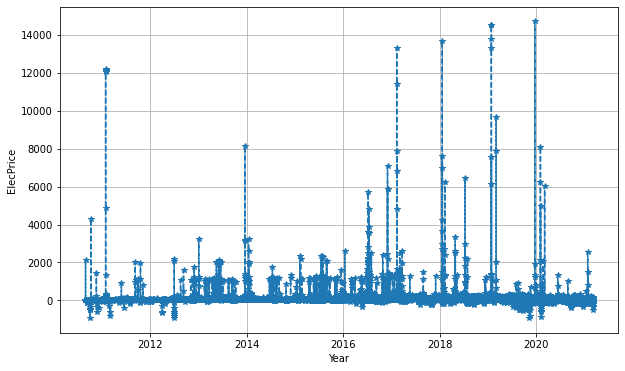

In [6]:
dataset[ "FullDate" ] = pd.to_datetime(dataset[ "FullDate" ]) #convert column to datetime
dataset.set_index( "FullDate" , inplace= True )
plt.figure(figsize=( 10 , 6 ))
plt.plot(dataset.index, dataset.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'ElecPrice' )

In [7]:
dataset.isnull().values.any()

False

In [8]:
dataset_copy = dataset.copy()
rows = dataset_copy.sample(frac= 0.1 , random_state= 0 )
rows[ 'ElecPrice' ] = np.nan
dataset_copy.loc[rows.index, 'ElecPrice' ] = rows[ 'ElecPrice' ]
dataset_copy.isnull().sum()

Tmax            0
SysLoad         0
GasPrice        0
ElecPrice    9202
dtype: int64

In [9]:
dataset.dtypes

Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [10]:
#Filling missing data by imputation - Forward fill
dataset_copy_ffill = dataset_copy.fillna(method= 'ffill' )
dataset_copy_ffill.isnull().sum()


Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [11]:
#Filling missing data by imputation - Backward fill
dataset_copy_bfill = dataset_copy.fillna(method= 'bfill' )
dataset_copy_bfill.isnull().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [12]:
#Filling missing data by interpolation
dataset_copy_LIF = dataset_copy.interpolate(method= 'linear' , limit_direction= 'forward' )
dataset_copy_LIF.isnull().sum()
dataset_copy_LIB = dataset_copy.interpolate(method= 'linear' , limit_direction= 'backward' )
dataset_copy_LIB.isnull().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [13]:
# Resampling "Daily"
dataset_daily = dataset.resample('D').sum()
dataset_daily

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


In [14]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(dataset['SysLoad' ])
print('ADF Statistic: {adf_result[ 0 ]}' )
print('p-value: {adf_result[ 1 ]}' )
print('No. of lags used: {adf_result[ 2 ]}' )
print('No. of observations used : {adf_result[ 3 ]}' )
print('Critical Values:' )



ADF Statistic: {adf_result[ 0 ]}
p-value: {adf_result[ 1 ]}
No. of lags used: {adf_result[ 2 ]}
No. of observations used : {adf_result[ 3 ]}
Critical Values:


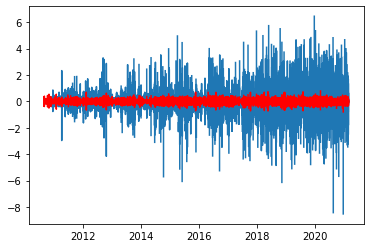

In [15]:
#Convert time series to stationary by removing trend and seasonality
#Transformation and Differencing
dataset_log = np.log(dataset)
dataset_diff = dataset_log.diff(periods= 1 )
plt.plot(dataset_diff.index, dataset_diff.SysLoad, '-' )
plt.plot(dataset_diff.rolling( 12 ).mean(), color= 'red' )

In [16]:
# Checking the correlation

dataset.corr()

,Tmax,SysLoad,GasPrice,ElecPrice
Tmax,1.000000,-0.009796,0.030173,0.002126
SysLoad,-0.009796,1.000000,-0.214574,0.138690
GasPrice,0.030173,-0.214574,1.000000,0.157768
ElecPrice,0.002126,0.138690,0.157768,1.000000


In [17]:
dataset_daily.reset_index(inplace=True)

x_test = dataset_daily.tail(365)
x_train = dataset_daily[:-365]

dataset_daily.dtypes

FullDate     datetime64[ns]
Tmax                float64
SysLoad             float64
GasPrice            float64
ElecPrice           float64
dtype: object

In [18]:
# Preparing the data for univariate analysis
dataset_uni = dataset_daily[['datetime','ElecPrice']]

# making a new dataframe from df_daily2 by renaming the columns
new_dataset = dataset_uni.rename(columns={"datetime": "ds", "ElecPrice": "y"})

KeyError: "['datetime'] not in index"

In [ ]:
from fbprophet import Prophet
x_test_uni = new_dataset.tail(365)
x_train_uni = new_dataset[:-365]

In [ ]:
# building the model
model = Prophet()

In [ ]:
# fitting the model
model.fit(x_train_uni)

In [ ]:
# predicting the test data

future = model.make_future_dataframe(periods=365 , freq= 'D' )
result_uni = model.predict(future)

In [ ]:
result_uni.shape

In [ ]:
result_uni.head()

In [ ]:
# Plotting the Graph
model.plot(result_uni)
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# MAPE Value
mean_absolute_percentage_error(x_test_uni['y'], result_uni['yhat'][-365:])

In [ ]:
# RMSE Calculation
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(x_test_uni['y'], result_uni['yhat'][-365:]))
print(rmse)

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize']= 15,8

In [ ]:
plt.plot(result_uni['ds'],result_uni['yearly'])
plt.show()

In [ ]:
model.plot_components(result_uni)

Min is at August

In [ ]:
new_dataset = dataset_daily.copy()
# making a new dataframe from df_daily & renaming the columns

new_dataset_mul= new_dataset.rename(columns={"datetime": "ds", "Global_active_power": "y","Global_reactive_power": "add1","Voltage": "add2","Global_intensity": "add3","Sub_metering_1": "add4","Sub_metering_2": "add5","Sub_metering_3": "add6"})

In [ ]:
# Train Test Split
x_test_multi = new_dataset_mul.tail(365)
x_train_multi = new_dataset_mul[:-365]

In [ ]:
print(x_train_multi)

In [ ]:
# Building Model - Prophet & Adding regressors
model_multi = Prophet()
model_multi.add_regressor('add1')
model_multi.add_regressor('add2')
model_multi.add_regressor('add3')
model_multi.add_regressor('add4')
model_multi.add_regressor('add5')
model_multi.add_regressor('add6')

In [ ]:
model_multi.fit(x_train_multi)

In [ ]:
future_multi = model_multi.make_future_dataframe(periods=365,freq='D')
future_multi['add1'] = new_df_mul['add1'].values
future_multi['add2'] = new_df_mul['add2'].values
future_multi['add3'] = new_df_mul['add3'].values
future_multi['add4'] = new_df_mul['add4'].values
future_multi['add5'] = new_df_mul['add5'].values
future_multi['add6'] = new_df_mul['add6'].values
result_multi= model_multi.predict(future_multi)

In [ ]:
future_multi.shape

In [ ]:
model_multi.plot(result_multi)
plt.show()

In [ ]:
# MAPE
mean_absolute_percentage_error( x_test_multi['y'][-365:], result_multi['yhat'][-365:])

In [ ]:
# RMSE
rmse_multi = sqrt(mean_squared_error( x_test_multi['y'][-365:], result_multi['yhat'][-365:]))
print(rmse_multi)

In [ ]:
print(x_train_uni)

In [ ]:
print(x_train_multi)

In [ ]:
model_multi.plot_components(result_multi)